In [35]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from autoreject import AutoReject

# Load and format raw data

We start by loading the raw data from the edf file. However, when we use print(raw.ch_names) we can see that the channel names contain a dot (e.g. "F7."). We remove the dot from the channel names by renaming the channels. We then pick the desired channels and define the channel positions according to the 10-20 system. We create a new montage with the channel positions and set the montage to the raw data.

this text refers to sample S001R04.edf

# 10-20 system and channels
![image info](./images/10_20_system.PNG)


In [36]:
def load_and_format_raw_data(file_path, desired_channels):
    # load the edf file with mne
    raw = mne.io.read_raw_edf(file_path, preload=True)

    print(raw.ch_names)

    # rename channels without "." (dot) in the name
    new_ch_names = {ch_name: ch_name.replace('.', '') for ch_name in raw.info['ch_names']}
    raw.rename_channels(new_ch_names)

    # pick desired channels
    raw.pick_channels(desired_channels)

    # define channel positions (10-20 system)
    montage = mne.channels.make_standard_montage('standard_1020')
    positions = {ch: montage.get_positions()['ch_pos'][ch] for ch in desired_channels}

    # create new montage with the channel positions
    new_montage = mne.channels.make_dig_montage(positions, coord_frame='head')

    # set montage
    raw.set_montage(new_montage)

    return raw

file_path = "sampleData/S010R10.edf"

# define list of desired channels (10-20 system; desired channels are the 14 emotiv epoc channels, but there are only 10 of them in the dataset)
desired_channels = ["F7", "F3", "T7", "P7", "O1", "O2", "P8", "T8", "F4", "F8"]

raw = load_and_format_raw_data(file_path, desired_channels)


# Load and format raw data

# we start by loading the raw data from the edf file. However, when we use print(raw.ch_names) we can see that the channel names contain a dot (e.g. "F7."). We remove the dot from the channel names by renaming the channels. We then pick the desired channels and define the channel positions according to the 10-20 system. We create a new montage with the channel positions and set the montage to the raw data.

Extracting EDF parameters from e:\11 Semester\Master-Thesis\Vorbereitung\working-with-eeg\sampleData\S010R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


# Filtering EEG Data

Human EEG largely comprises signal power in a range of frequencies from 1–30 Hz; there is some evidence that higher frequencies may also carry important neurophysiological information, however in most EEG studies  the vast majority of research questions concerns EEG signals in the 1–30 Hz frequency range.

Sources of noise manifest as oscillating frequencies that are picked up by EEG. In particular, low frequency noise comes from sources such as movement of the head and electrode wires, and perspiration on the scalp. Low frequency noise appears as slow drifts in the EEG signal over many seconds. In contrast, high frequency noise comes from sources including electromagnetic interference, and muscle contractions (especially facial and neck muscles). High frequency noise looks like rapid up-down changes (like the teeth of a saw) in the EEG.

The frequency of high and low frequency sources of noise may overlap with the 1-30 Hz EEG band of interest, but in general they tend to be lower and higher, respectively, than human EEG. This means that by reducing the power of the signal at the frequencies above and below the range of experimental interest, we can reduce noise with minimal impact on the signals of interest. This process is called filtering.

### why fmax=80?
Nyquist theorem: This theorem states that the highest frequency that can be correctly detected is half the sampling rate. At a sampling rate of 160 Hz, the Nyquist frequency is 80 Hz.
https://www.bitbrain.com/blog/eeg-amplifier

### why does the power decrease with increasing frequency? 
This phenomenon in PSD analysis is a typical feature of many EEG signals and is referred to as the “1/f property” or “1/f noise”. The higher power in low frequency ranges and the decrease in power at higher frequencies is a natural characteristic of the human EEG. This indicates a stronger synchronization of neuronal activity at lower frequencies.


## PSD (Power Spectral Density)

power spectral density (PSD): Power refers to the amplitude of sine waves when we are working in the frequency domain, spectrum means a range of frequencies, and density basically means we’re quantifying the power over a range of frequencies. Computing the PSD involves applying a mathematical formula called the Fast Fourier Transform. This is one of the more time-consuming steps in EEG preprocessing

The PSD analysis shows how the energy (power) of an EEG signal is distributed over different frequencies. Think of the EEG signal as a piece of music, and the PSD analysis as a kind of equalizer that shows how loud each pitch (frequency) is in that piece.



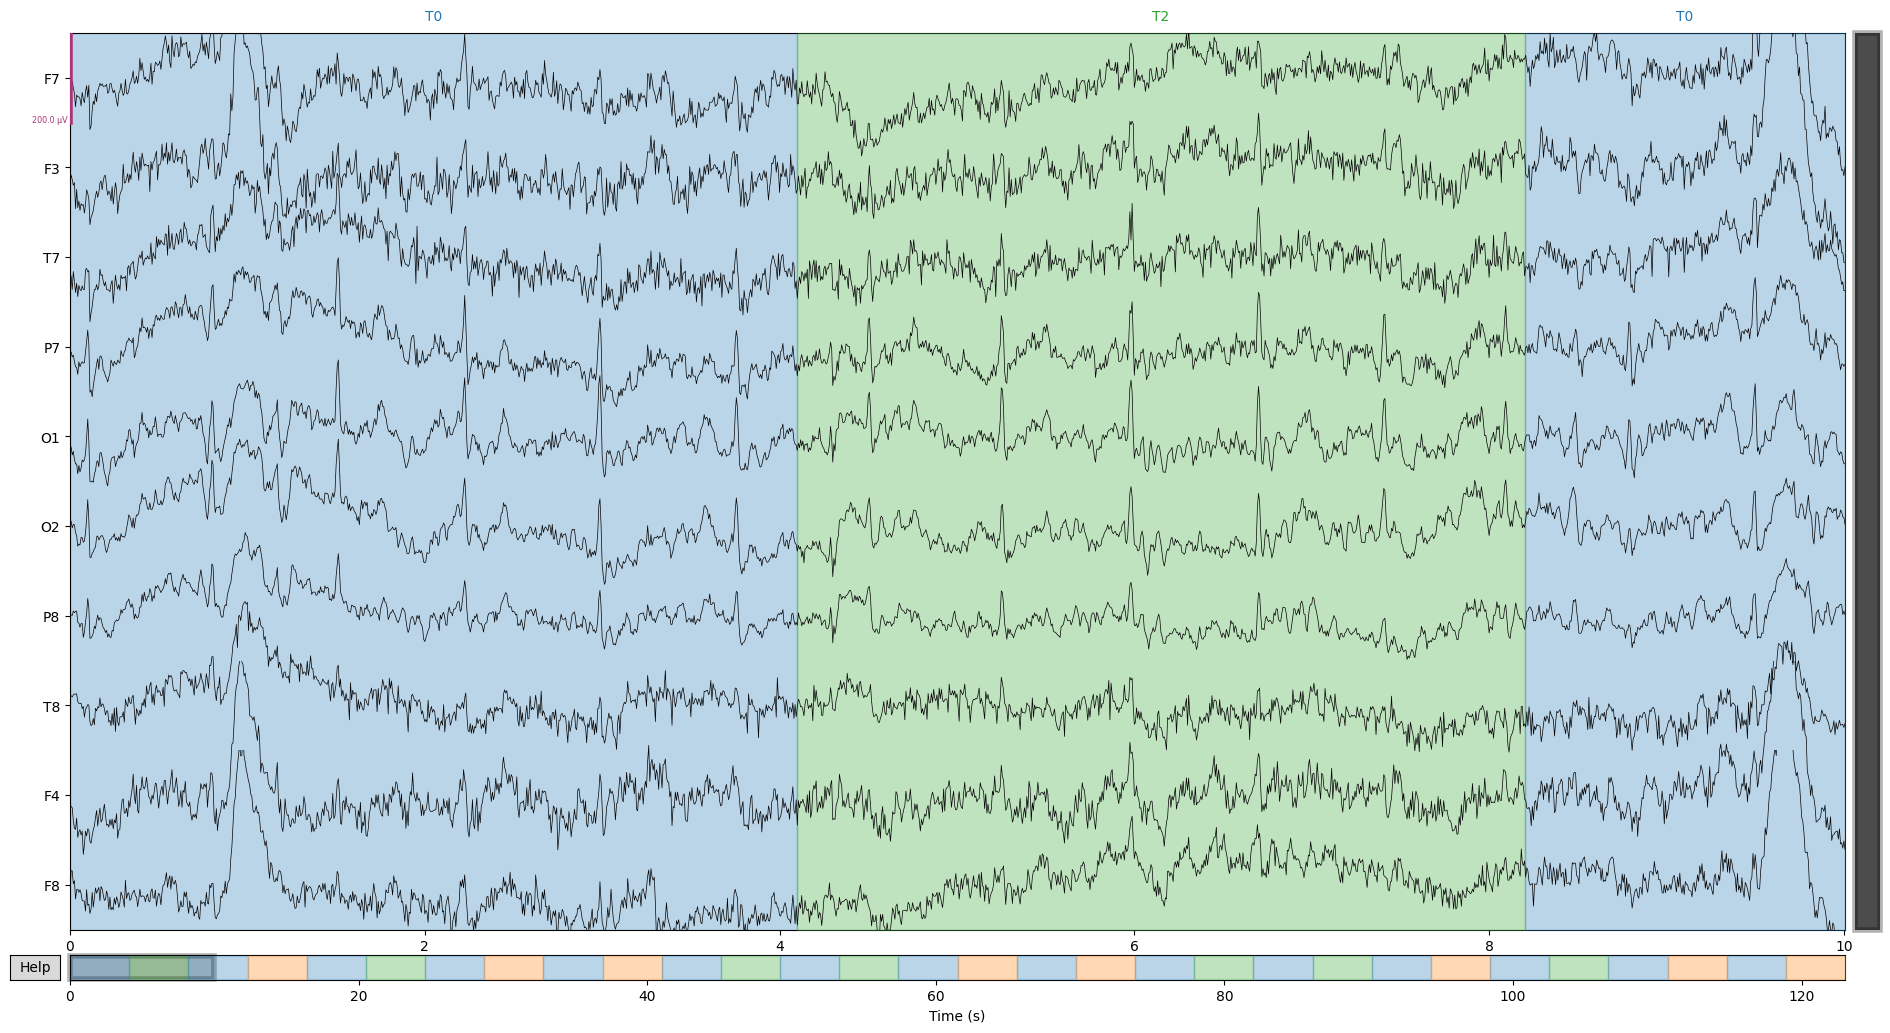

Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).
Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


C:\Users\starp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
C:\Users\starp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


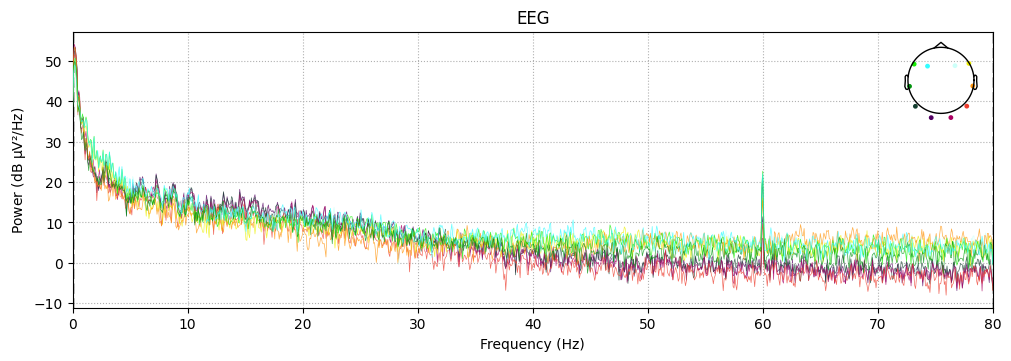

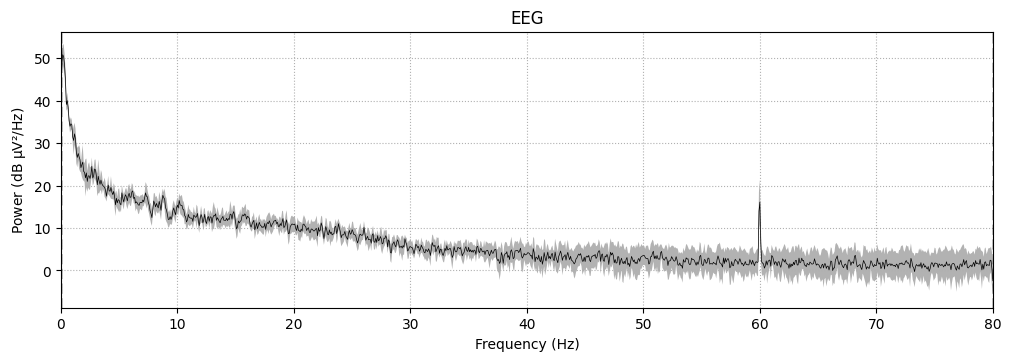

In [37]:
def identify_artifacts(raw_data, desired_channels):
    raw = raw_data

    # plot the original data for each channel
    raw.plot(title="Raw Data for each channel", duration=10, n_channels=len(desired_channels), scalings=0.0001)

    # calculate the power spectral density of the original data and plot it
    # plot the power spectral density of the original data, excluding bad channels and limiting the frequency to 80 Hz because the data is sampled at 160 Hz
    raw.compute_psd(fmax=80).plot(picks="data", exclude="bads", amplitude=False)

    # plot the average power spectral density of the original data, excluding bad channels and limiting the frequency to 80 Hz because the data is sampled at 160 Hz and averaging over all channels
    raw.compute_psd(fmax=80).plot(picks="data", exclude="bads", amplitude=False, average=True)

    plt.show()

    # we can in the psd plot that there is a huge artifact in the data at 60 Hz
    # the 60 Hz artifact (lion noise) is most likely caused by the power line noise (50Hz = Europe, 60Hz = US)
    # we can also see that the data is not clean and there are other artifacts present

identify_artifacts(raw, desired_channels)

we have started by plotting the original data for each channel. We then calculate the power spectral density of the original data and plot it. We can see that there is a huge artifact in the data at 60 Hz. The 60 Hz artifact (lion noise) is most likely caused by the power line noise (50Hz = US, 60Hz = EU).
(if you have a higher sampling rate and set fmax to 256, for example, it may be that the lion noise occurs not only at 60Hz, but also at 120Hz, 180Hz and 240Hz (its 2nd, 3rd, and 4th harmonics).)


# Filter the raw data

The important (required) parameters are hi_cut and low_cut, and here we are specifying a bandpass filter with a low frequency (highpass) cutoff of 0.1 Hz, and a high frequency (lowpass) cutoff of 30 Hz. There are many other parameters taht can be set, as MNE’s filtering function is quite robust. However, the defaults for these parameters have been set to already be optimized for most EEG and MEG data.



Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 5281 samples (33.006 s)

Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


C:\Users\starp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


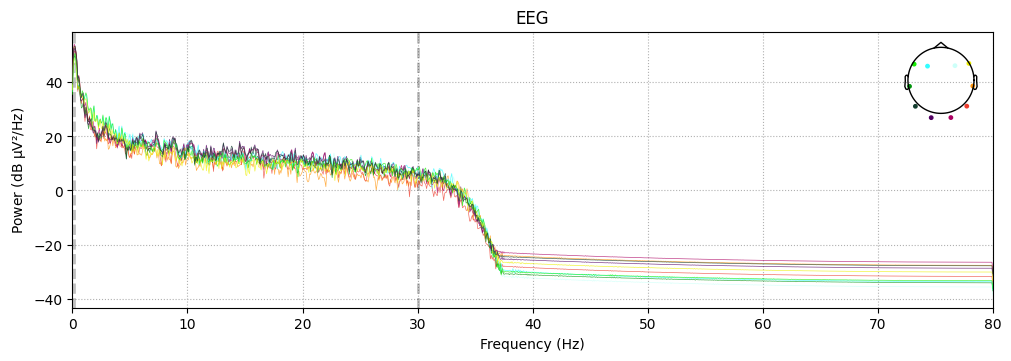

Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


C:\Users\starp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


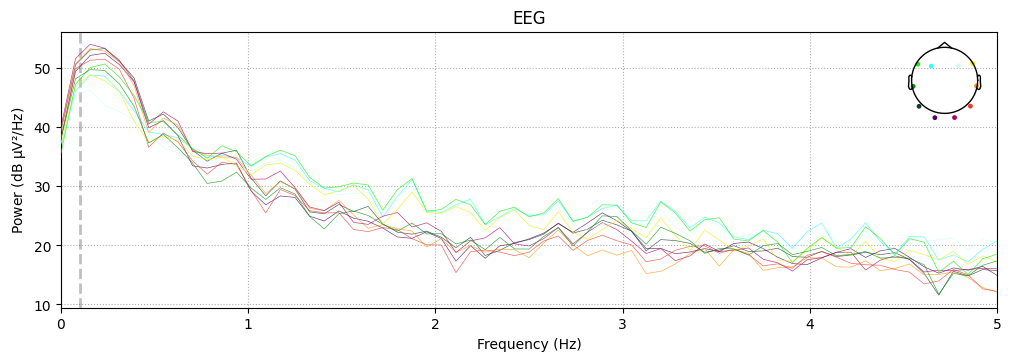

In [38]:
# Filter settings
low_cut = 0.1
hi_cut  = 30

raw_filt = raw.copy().filter(low_cut, hi_cut)

raw_filt.compute_psd().plot()
plt.show()
raw_filt.compute_psd(fmax=5).plot()
plt.show()

The effects of our low-pass filter are quite evident — in comparison to the pre-filtering PSD, there is a dramatic drop in power above our 30 Hz cutoff (note that the dashed line has moved to reflect our new low-pass cutoff). The spike at 60 Hz is gone (actually it’s still there, but very small), because the filtering virtually eliminated this noise from the data.

The effects of the high-pass filtering are much harder to see, since the scale is linear from 0–100 Hz, but our cutoff of 0.1 Hz was very close to zero. If we set fmax to 5 we can see the effects of the high-pass cutoff more clearly:

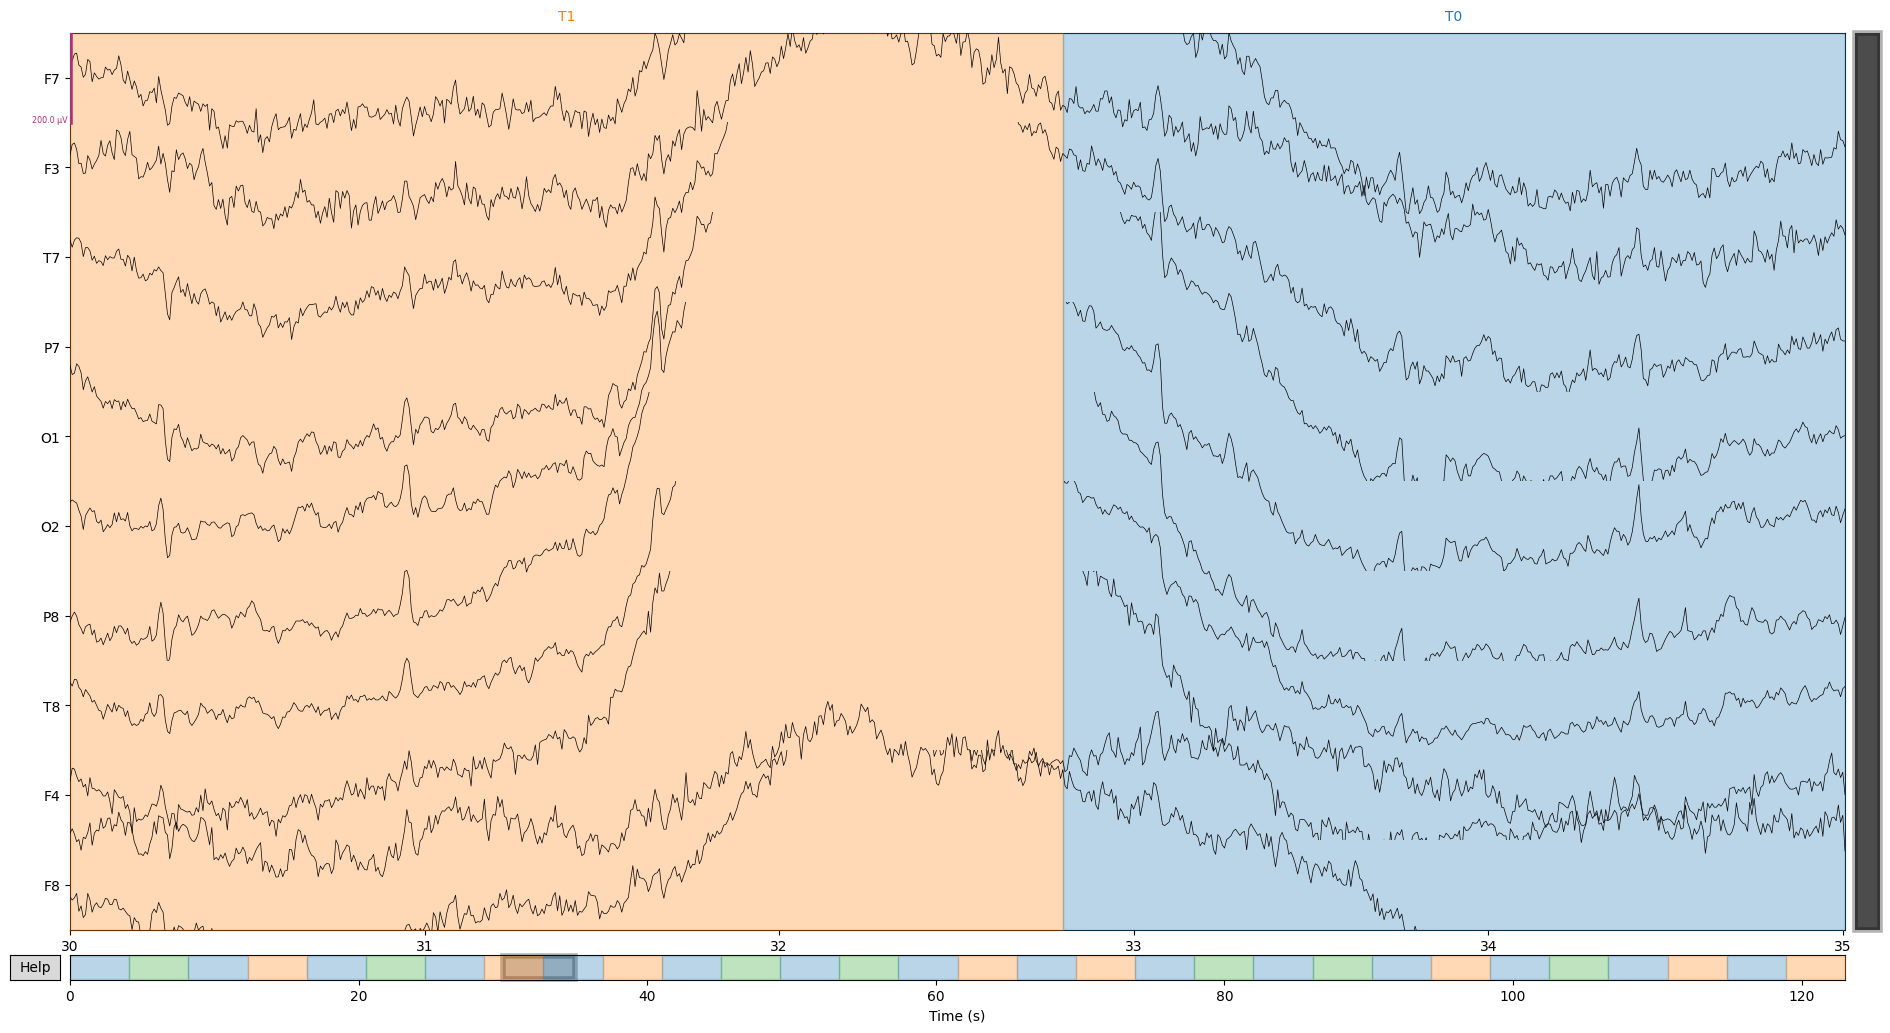

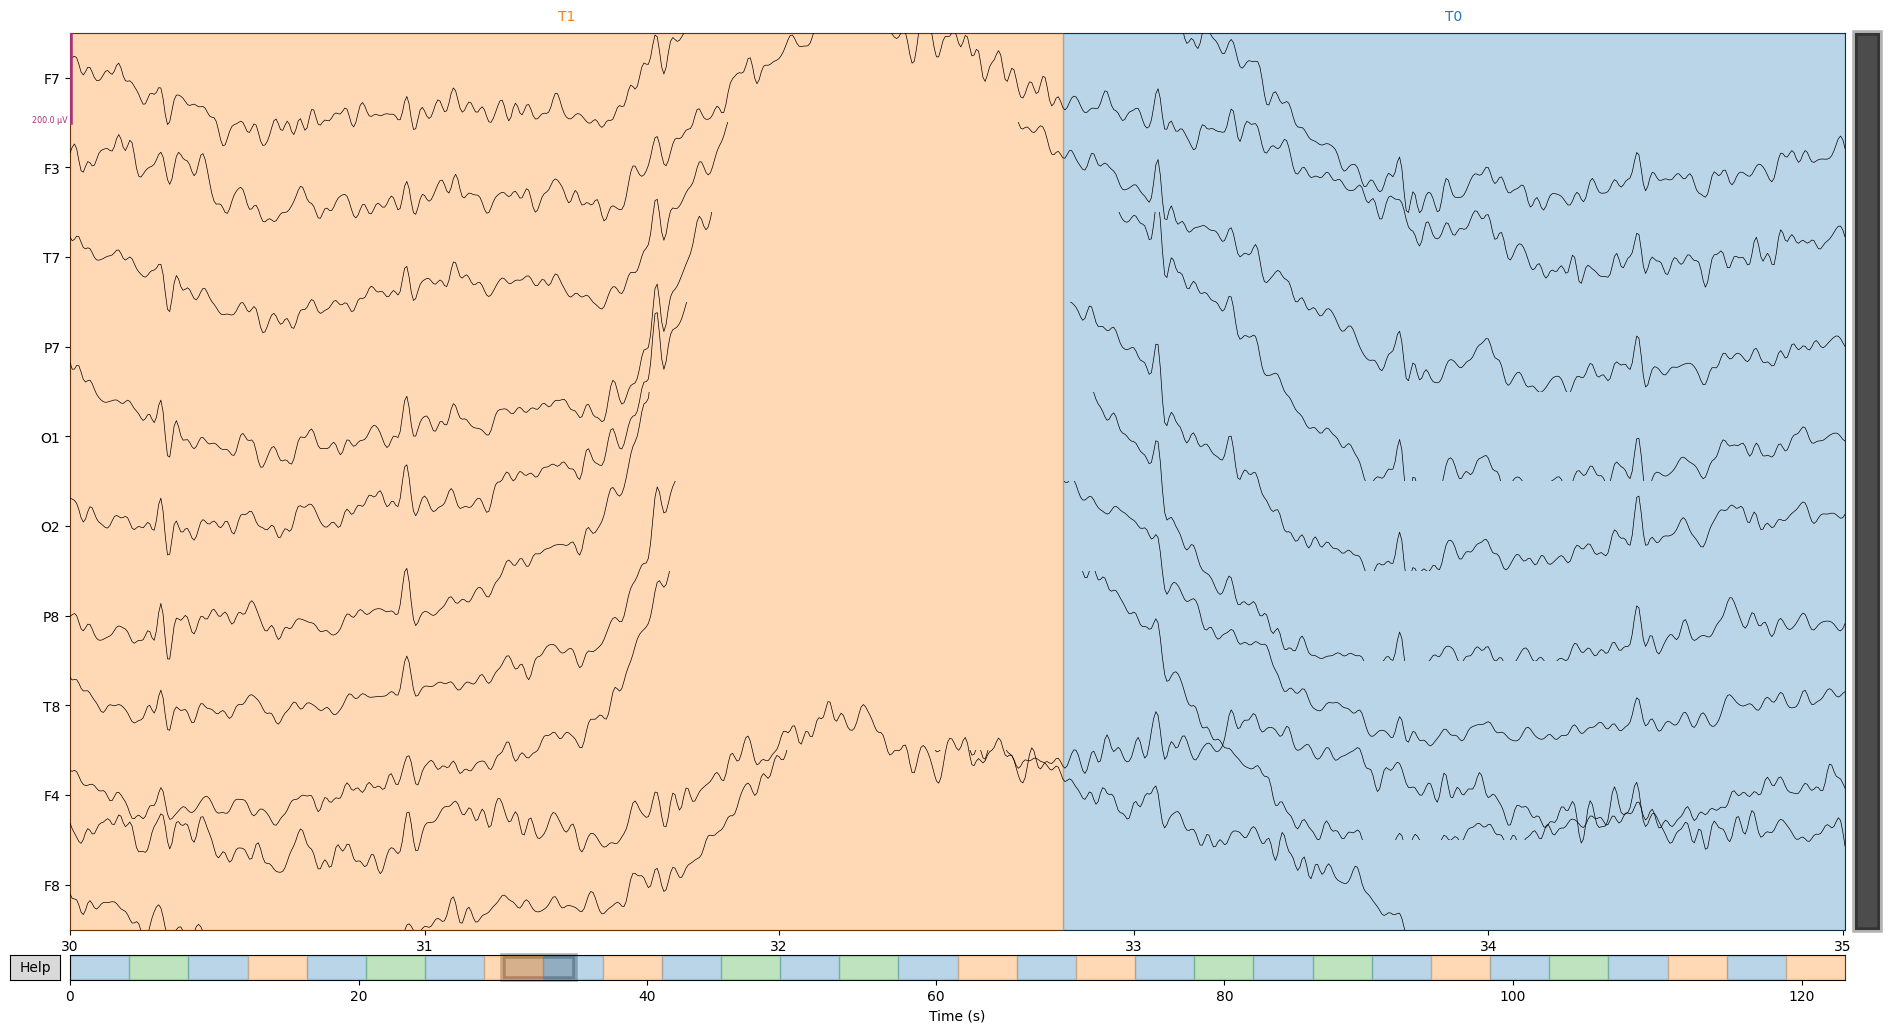

In [39]:
raw.plot(start=30, duration=5, scalings=0.0001);  # times are in seconds
plt.show()

raw_filt.plot(start=30, duration=5, scalings=0.0001);
plt.show()

in the picture above we see a 5 sec section of the unfiltered data and below a 5 sec section of the filtered data.

the plot below shows the same sample of data after filtering. The high frequency noise is gone. The low-frequency noise is perhaps a bit reduced, but not eliminated. This is because our high-pass filter setting was 0.1 Hz, which means that only frequencies below 1 cycle per 10 sec would be reduced. These are so slow that we would not even see much evidence of them in 5 sec of data. Although we could filter the data with a higher high-pass cutoff (e.g., 1 Hz instead of 0.1 Hz), this risks inducing artifacts into the data (Tanner, Morgan-Short, & Luck, 2015), so we don’t.

# Artifacts in Data

Eye blink, Eye movements, Muscle contractions, ...

unipolar artefacts = https://pressrelease.brainproducts.com/eeg-artifacts-handling-in-analyzer/

bipolar artefacts = https://www.learningeeg.com/artifacts#w-tabs-0-data-w-pane-1

the example dataset uses unipolar EEG data, which means that the reference is the same for all channels

# Artifact removal with Independent Components Analysis (ICA)

ICA is a blind source separation algorithm. In other words, it can take a complex signal and separate it into mathematically independent components. In ICA components are the individual underlying signals that were mixed together during recording. So for example, in EEG each electrode will record a mixture of brain activity (which itself may comprise multiple sources within the brain, such as the activity of different brain areas) and noise (including physiological and non-physiological artifacts). ICA is capable of separating EEG from artifacts (and separating different types of artifacts) because, over time and across all of thr recording electrodes, each signal with a different source will have different spatio-temporal properties.

A nice example of using ICA, that may seem a bit less abstract than EEG data, is audio recording. Imagine that we have two people in a room having a conversation, and there is background noise in the room such as from the ventilation system. If we have a single microphone in the room, all three signals (person A, person B, and the ventilation) will be mixed in the recording and it will be hard to separate them. However, if we have three microphones at different locations in the room, then each will pick up all three sound sources, but to different degrees depending on the location of each microphone. ICA can use the audio from all three microphones to find independent sources in the data (i.e., person A, person B, and the ventilation), based on how the sounds from each person, and the ventilation, differ systematically across the three microphones. But this only works because we have multiple independent sources (the microphones) sampling the data from different locations.

Likewise with EEG, it is necessary to have multiple electrodes (the sources) to run ICA. The maximum number of ICA components that can be derived from a data set is equal to the number of electrodes (channels) we have. However, in practice the number of independent sources in the data is lower than the number of electrodes, and we can limit the number of ICA components accordingly

In EEG, ICA has become widely used for artifact identification and removal. This is because it does a very good job of identifying ocular artifacts (blinks and eye movements), and also usually muscle artifact as well. Moreover, because the different ICA components are mathematically independent of each other, having identified which components are “noise” (such as blinks), we can remove these components from the data without affecting the other components. This means we can effectively remove the effects of ocular artifacts from the data, while preserving the EEG signals. This is usually preferable to older approaches, such as removing any trial containing an artifact from the data set completely. ICA allows us to remove artifacts while keeping all of the trials.


# Filter Data for ICA

ICA is very good at capturing features of the data that explain the most variance. Recall that variance, statistically speaking, is any deviation from the mean. Blinks and eye movements are well-captured by ICA because they are so much larger than EEG, and so they contain a lot of the variance in the EEG recordings. Likewise, low-frequency drift in the data explains large amounts of variance, because of the 1/f property of EEG data discussed earlier — the lowest frequencies contain the most power.

For this reason, ICA works best on data that has more low-frequency power removed than the data that we ultimately want to analyze. So we will filter the data for ICA with a 1 Hz high-pass cutoff, rather than the 0.1 Hz cutoff as we used in the filtering lesson (which is a more typical cutoff for ERP data). We can compute ICA based on the 1 Hz filtered version of the data, identify the artifacts based on this, and then apply the same ICA decomposition (i.e., how ICA breaks the data down into components) to the data that were filtered as we wanted for ERP analysis. This allows us to filter the data optimally for ICA, and then apply the artifact correction to data filtered the way it should be for ERPs.

In [40]:
# Filter settings
ica_low_cut = 1.0 # For ICA, we filter out more low-frequency power
hi_cut  = 30

raw_ica = raw.copy().filter(ica_low_cut, hi_cut)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 529 samples (3.306 s)



ICA works best with segments of data, rather than the continuous raw data. We call segments of EEG data epochs, a word which means “a period of time”. Typically when talking about ERPs, epochs refers to the segments of data that are time-locked to experimental events of interest. Here, however, we use the term more generically to refer to any segment of EEG data. So here we will segment the entire raw data recording into a series of consecutive 1 s segments (i.e., 0-1 s, 1-2 s, etc.), ignoring the event markers for now.

In [41]:
# Break raw data into 1 s epochs
tstep = 1.0
events_ica = mne.make_fixed_length_events(raw_ica, duration=tstep)
epochs_ica = mne.Epochs(raw_ica, events_ica,
                        tmin=0.0, tmax=tstep,
                        baseline=None,
                        preload=True)

Not setting metadata
123 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 123 events and 161 original time points ...
1 bad epochs dropped


# Pre-Clean Data for ICA

Next we run a function from the AutoReject package that will look at the data and automatically determine a threshold to use to find sections of the data that are excessively noisy. This can occur, for example, if a participant scratches their head during a recording, or sneezes, or for various other reasons. These “one-off” sources of noise can create large artifacts in the data. Since large amplitudes mean high variance, the presence of these artifacts can interfere with ICA’s finding more frequent artifacts like blinks — since blinks are larger than EEG data, but smaller than these one-off sources of noise.

AutoReject, as the name implies, is an automated and data-driven way of determining a threshold to distinguish between “noisy” and “clean” channels and epochs in the data. It is an iterative process that repeatedly takes sub-samples of the entire data set, and computes the variance of each channel and epoch. It then computes a threshold for each channel and epoch, based on the distribution of variances across the entire data set. It then rejects any channels or epochs that exceed the threshold.

# !
ICA is able to clean up some of the artifacts identified with AutoReject, so here we will compute the AutoReject threshold and use it to mark (but not reject) major artifacts. Then we’ll run ICA on only the clean subset of data, and apply ICA correction to remove artifacts. After that, we’ll run AutoReject again, but this time we will actually use it to also correct any remaining artifacts that ICA did not fix.


shown below, the y axis is the channels, and the x axis is epochs. Green areas are “good” data. The red vertical lines indicate epochs that were marked as “bad” by AutoReject. The blue lines indicate that specific channels that were marked as “bad” on epochs where most of the channels were considered “good”. In these cases, AutoReject has interpolated the data from those bad channels, based on the data from surrounding channels, rather than rejecting the entire epoch based on one or a small number of bad channels.

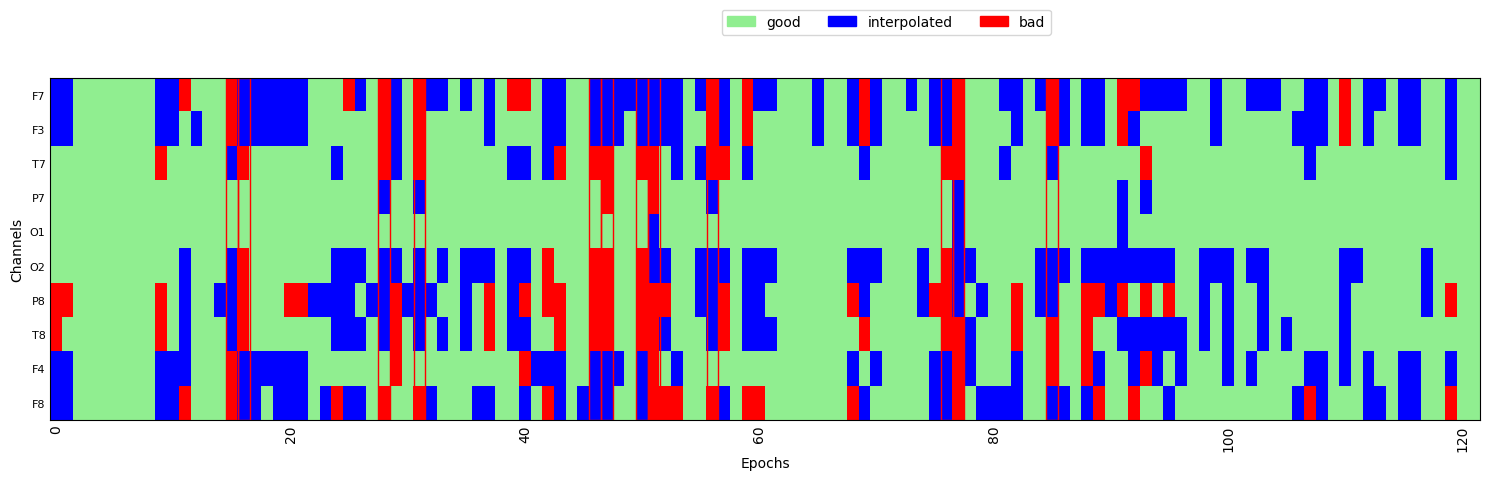

In [42]:
ar = AutoReject(n_interpolate=[1, 2, 4],
                random_state=42,
                picks=mne.pick_types(epochs_ica.info, 
                                     eeg=True,
                                     eog=False
                                    ),
                n_jobs=-1, 
                verbose=False
                )

ar.fit(epochs_ica)

reject_log = ar.get_reject_log(epochs_ica)



fig, ax = plt.subplots(figsize=[15, 5])
reject_log.plot('horizontal', ax=ax, aspect='auto')
plt.show()

# Fit ICA to the Data

The first parameter that we want to specify is the number of independent components we want. Recall that by default, ICA will compute as many components as there are channels in the data, but this is typically more than is necessary or useful. The n_components parameter of ICA can be specified in one of two ways. One is to provide an integer specifying the actual number of components desired. An optimal number for this, however, is hard to know in advance. The other way is to specify a floating point number ≤ 1, which represents the percentage of data that the ICA components should, collectively, explain. Here we use .99, which means we want as many independent components as needed to explain 99% of the variance in the data. Typically this is a good value to use.

The other parameter is random_state. We use this because ICA is an iterative algorithm that starts with a set of random parameters, and then over a series of fitting steps computes the optimal values of these parameters. The set of random parameters it starts with determines the results to some extent. That is, if you fit ICA repeatedly to the data, you will generally get very similar, but not identical, results each time, because of the different random starting points. By specifying a random_state, we ensure that the same “random” parameters are used each time, meaning that our results will be replicable

In [43]:
# ICA parameters
random_state = 69   # ensures ICA is reproducible each time it's run
ica_n_components = .99     # Specify n_components as a decimal to set % explained variance

# Fit ICA
ica = mne.preprocessing.ICA(n_components=ica_n_components,
                            random_state=random_state,
                            )
ica.fit(epochs_ica[~reject_log.bad_epochs], decim=3)

Fitting ICA to data using 10 channels (please be patient, this may take a while)
Selecting by explained variance: 9 components
Fitting ICA took 0.1s.


<ICA | epochs decomposition, method: fastica (fit in 26 iterations on 5940 samples), 9 ICA components (10 PCA components available), channel types: eeg, no sources marked for exclusion>

# Visualize ICA components

Every IC (an independent component identified by ICA) is a signal that varies over time, that has a “weighting” at each channel - reflecting how strongly present that IC is in that channel. In other words, the time course of an IC is the same at all electrodes, but it is bigger at some, and smaller at others.

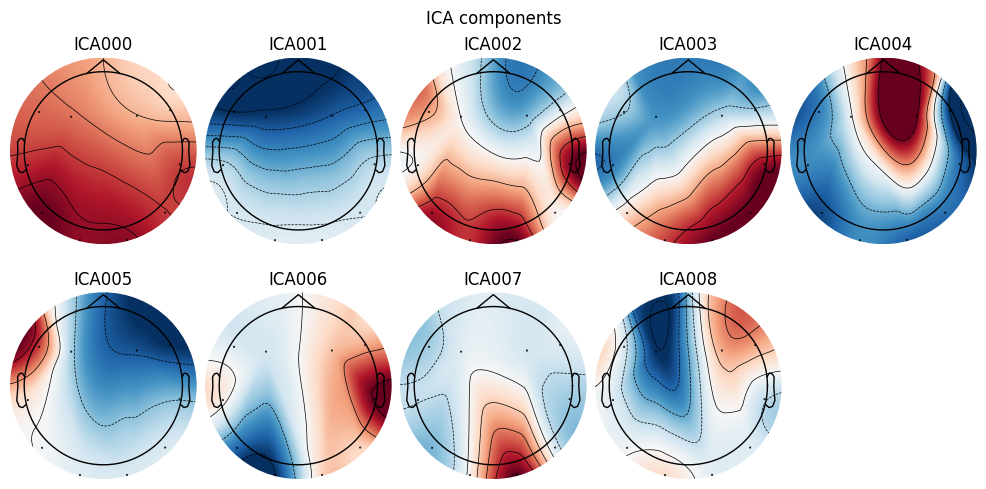

In [44]:
ica.plot_components();
plt.show();

In particular, ICA004 is likely horizontal eye movements.

# Plot IC properties

We can see:

- The topo map

- A raster plot of how the IC weights on each trial. Artifacts like blinks should appear as “streaks” lasting about 200-300 ms, on relatively few trials. Components reflecting brain activity are typically present across many epochs (although remember that these data are segmented into 1 s epochs across the entire raw data set, so we would not expect to see time-locked activity here)

- Variance of the component, across channels and time. The x axis is epochs (effectively, time across the experiment), and the y axis is the variance of the IC across channels. Noise typically manifests as high variance on a low number of trials, and low variance on most trials, or lots of variability in the values on the y axis over epochs. True brain activity usually appears as consistently similar — and low — variance across epochs.

- The PSD (phase spectral density) of the IC. EOG (eye) artifacts will typically have a peak at the low frequency end of the spectrum (the left side of the x axis), and muscle artifact will tend to show increasing power at the high end of the frequency spectrum (the right side of the x axis).

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
122 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
122 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
122 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
122 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
122 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
122 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
122 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
122 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
122 matching events found
No baseline correction applied
0 pro

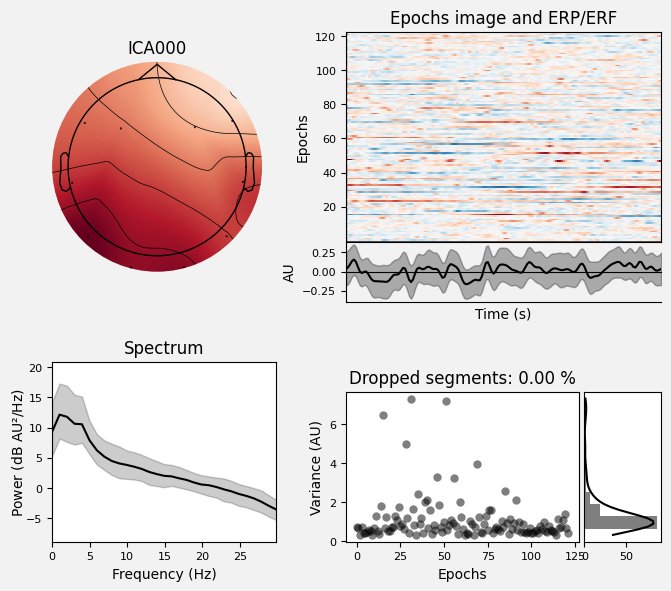

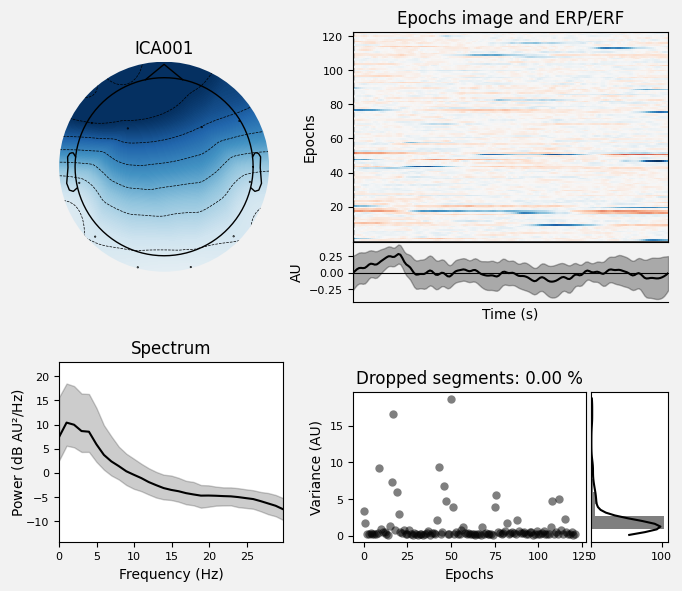

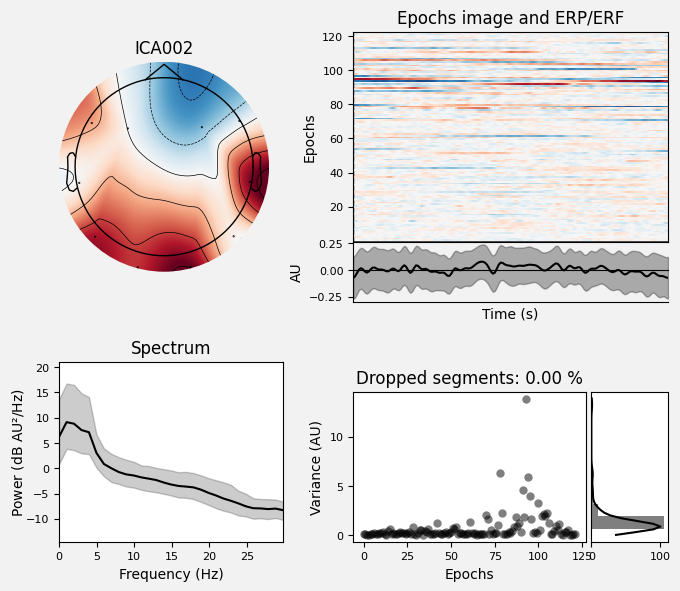

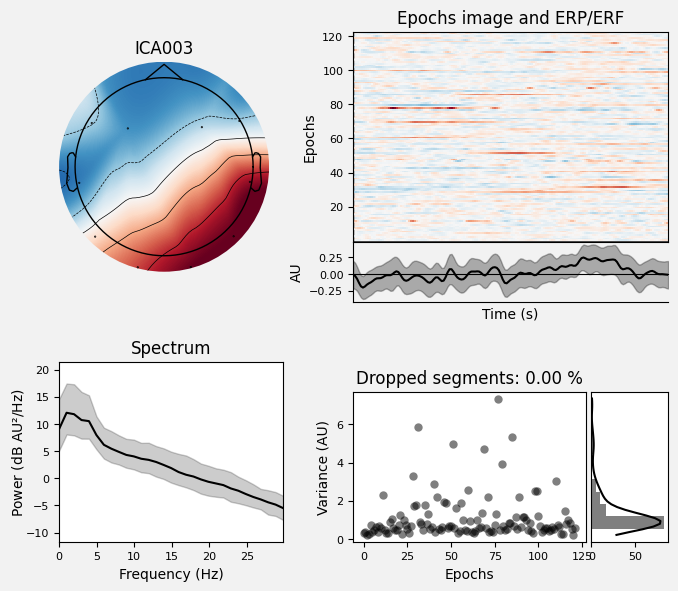

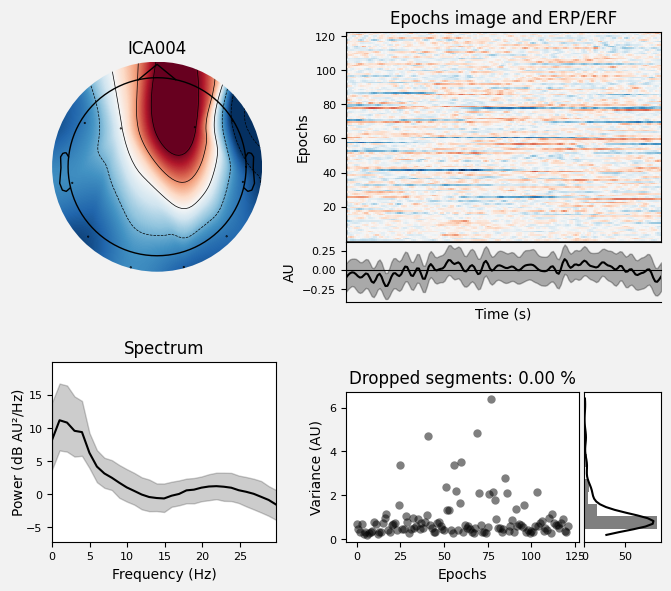

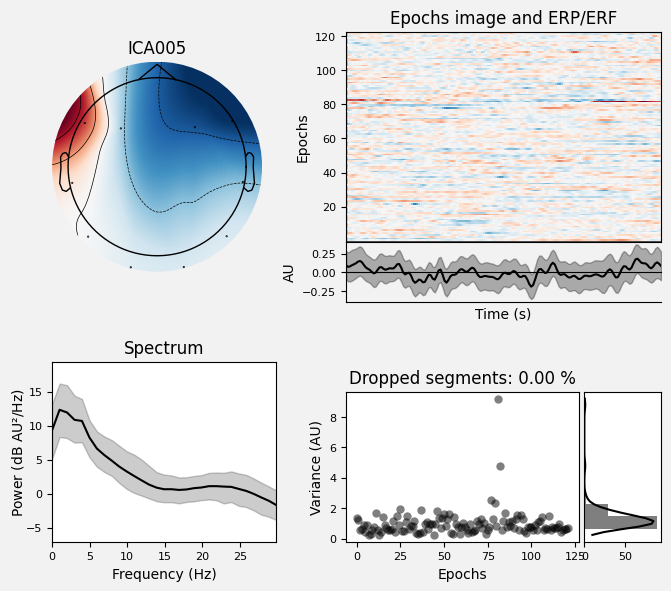

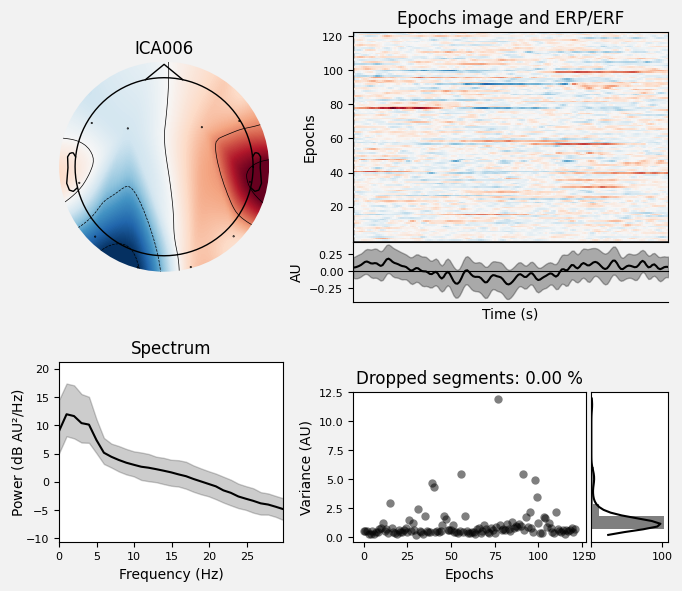

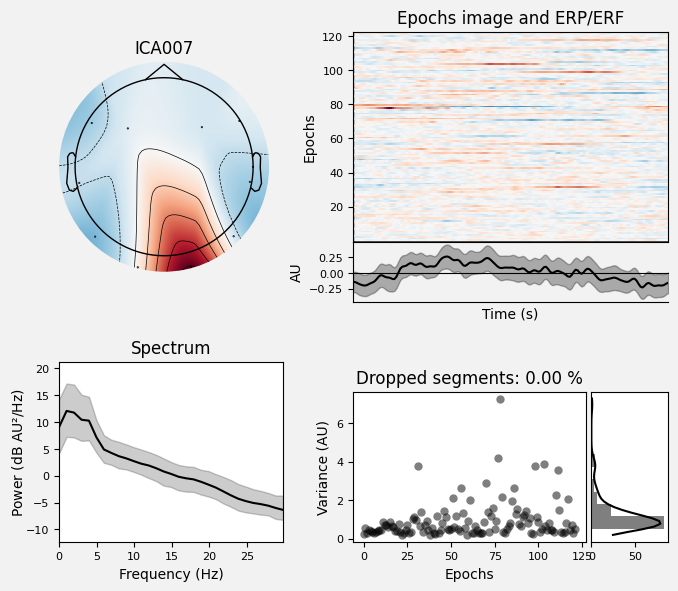

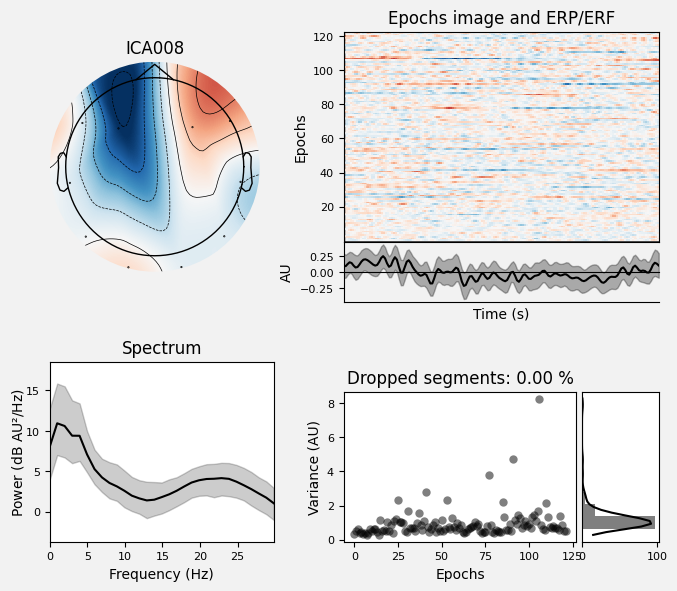

In [45]:
ica.plot_properties(epochs_ica, picks=range(0, ica.n_components_), psd_args={'fmax': hi_cut});

We can assume that ICA001 is blink artifacts because the scalp topography is most heavily weighted at the electrodes directly over the eyes (where blinks are most strongly detected). We see a high variance on some trials, and the PSD is highest at the lower end of the spectrum.

ICA004 could be horizontal eye movements, as the scalp topography is maximal at the left and right anterior scalp sites, with opposite polarities (blue vs. red). This is characteristic of horizontal eye movements.

# Identify EOG Artifacts from ICA Components

MNE has an algorithm that attempts to automatically identify ICA components. The find_bads_eog() function computes correlations between each IC and channels that the researcher has designated as EOG (electro-oculogram) channels. These are electrodes, the same as EEG electrodes, but intentionally placed close to the eyes specifically to monitor for blinks and eye movements. These are typically placed above and below one eye (to monitor blinks and vertical eye movements, as well as on the temples of the head laterally to the eyes (to monitor horizontal eye movements).

In the present data set, the system has 10 selected scalp electrodes but no EOG electrodes, so EOG was not recorded. However, F7 and F8 are close enough to the sides of the eyes to detect horizontal movements. find_bads_eog() takes a ch_name kwarg to allow us to specify a list of EEG channels that we want to use in place of EOG channels.

In [46]:
# Initialize variables
ica.exclude = []  # List to store ICA components to be excluded
num_excl = 0  # Counter for number of excluded components
max_ic = 2  # Maximum number of components to exclude
z_thresh = 3.5  # Initial z-score threshold
z_step = .05  # Step size to decrease z-score threshold

# Iterative process to find EOG components
while num_excl < max_ic:
    # Find EOG-related ICA components
    eog_indices, eog_scores = ica.find_bads_eog(epochs_ica,
                                                ch_name=['F7', 'F8'],  # Frontal channels typically capturing eye movements
                                                threshold=z_thresh  # Current z-score threshold
                                                )
    
    # Update the number of excluded components
    num_excl = len(eog_indices)
    
    # Decrease the z-score threshold for the next iteration
    z_thresh -= z_step  # This reduction won't affect if num_excl is already >= max_ic

# Assign the identified EOG components to be excluded
ica.exclude = eog_indices

# Print the final z-score threshold used
print('Final z threshold = ' + str(round(z_thresh, 2)))

Using EOG channels: F7, F8
Using EOG channels: F7, F8
Using EOG channels: F7, F8
Using EOG channels: F7, F8
Using EOG channels: F7, F8
Using EOG channels: F7, F8
Using EOG channels: F7, F8
Using EOG channels: F7, F8
Using EOG channels: F7, F8
Using EOG channels: F7, F8
Using EOG channels: F7, F8
Using EOG channels: F7, F8
Using EOG channels: F7, F8
Using EOG channels: F7, F8
Using EOG channels: F7, F8
Using EOG channels: F7, F8
Using EOG channels: F7, F8
Using EOG channels: F7, F8
Using EOG channels: F7, F8
Using EOG channels: F7, F8
Using EOG channels: F7, F8
Using EOG channels: F7, F8
Using EOG channels: F7, F8
Using EOG channels: F7, F8
Using EOG channels: F7, F8
Using EOG channels: F7, F8
Using EOG channels: F7, F8
Using EOG channels: F7, F8
Using EOG channels: F7, F8
Using EOG channels: F7, F8
Final z threshold = 2.0


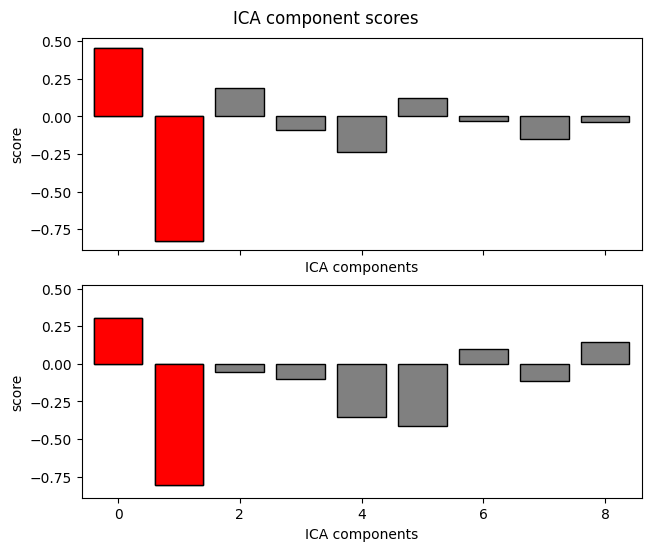

In [47]:
ica.plot_scores(eog_scores);

In the above plot we can see that ICs 1 and 4 had the highest correlation values, and were rejected. This is what we expected, based on the scalp topographies and other properties of these ICs that we saw above.